# SWCON253 Machine Learning

# Gradient Boosting Stacking

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

# Gradient Boosting

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=0)
gbrt = GradientBoostingClassifier().fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.9736842105263158

# Illustration on synthetic regression dataset

In [4]:
from sklearn.ensemble import GradientBoostingRegressor

def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x))
    y = (y_no_noise + rnd.normal(scale=0.2, size=len(x))) / 2
    return x.reshape(-1, 1), y
X, y = make_wave(100)

def make_poly(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (x) ** 3
    y = (y_no_noise + rnd.normal(scale=3, size=len(x))) / 2
    return x.reshape(-1, 1), y

X, y = make_poly()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=10, learning_rate=.3, random_state=0).fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.8117763334371787

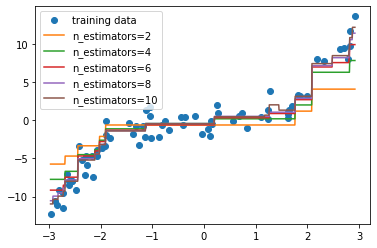

In [5]:
line = np.linspace(X.min(), X.max(), 1000)
preds = list(gbrt.staged_predict(line[:, np.newaxis]))
plt.plot(X_train[:, 0], y_train, 'o', label="training data")
for i in range(1, 10, 2):
    plt.plot(line, preds[i], label="n_estimators={}".format(i + 1))

plt.legend()

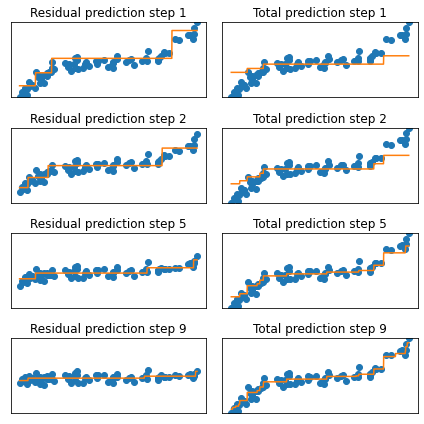

In [6]:
preds_train = [np.zeros(len(y_train))] + list(gbrt.staged_predict(X_train))


fig, axes = plt.subplots(4, 2, subplot_kw={'xticks': (()), 'yticks': (())}, figsize=(6, 6))
#fig, axes = plt.subplots(4, 2, figsize=(12, 12))

n_estimators = [0, 1, 4, 8]
for i in range(4):
    k = n_estimators[i]
    axes[i, 0].plot(X_train[:, 0], y_train - preds_train[k], 'o')
    axes[i, 0].plot(line, gbrt.estimators_[k, 0].predict(line[:, np.newaxis]))
    axes[i, 1].plot(X_train[:, 0], y_train, 'o')
    axes[i, 1].plot(line, preds[k])
    axes[i, 0].set_title("Residual prediction step {}".format(k + 1))
    axes[i, 1].set_title("Total prediction step {}".format(k + 1))

for ax in axes.ravel():
    ax.set_ylim(y.min(), y.max())
plt.tight_layout()
plt.savefig("images/grad_boost_regression_steps.png")

# illustration on synthetic moon data


In [7]:
from sklearn.datasets import make_moons
X, y = make_moons(noise=.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=10, learning_rate=.2, random_state=0).fit(X_train, y_train)
gbrt.score(X_test, y_test)

1.0

In [8]:
# create a grid for plotting decision functions...
x_lin = np.linspace(X_train[:, 0].min() - .5, X_train[:, 0].max() + .5, 100)
y_lin = np.linspace(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5, 100)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]

probs = list(gbrt.staged_predict_proba(X_grid))


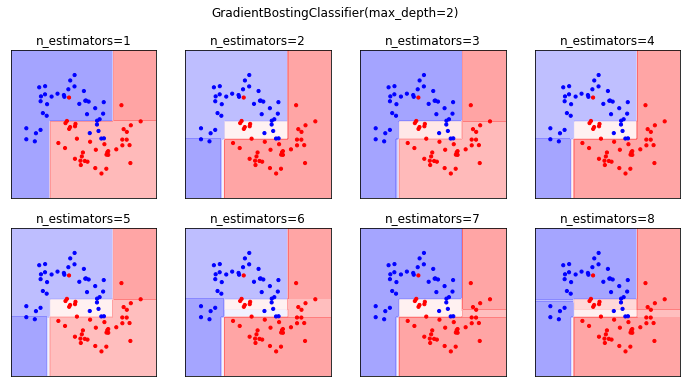

In [9]:
fig, axes = plt.subplots(2, 4, subplot_kw={'xticks': (()), 'yticks': (())}, figsize=(12, 6))
for i, (prob, ax) in enumerate(zip(probs, axes.ravel())):
    ax.set_title("n_estimators={}".format(i + 1))
    ax.contourf(x_grid, y_grid, prob[:, 1].reshape(x_grid.shape), alpha=.4, cmap='bwr')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=10)
fig.suptitle("GradientBostingClassifier(max_depth=2)")
plt.savefig("images/grad_boost_depth2.png")

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [.2, .1, .05, .02, .01, .001]}
grid = GridSearchCV(GradientBoostingClassifier(),
                    param_grid=param_grid, cv=10,
                    return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.2, 0.1, 0.05, 0.02, 0.01, 0.001]},
             return_train_score=True)

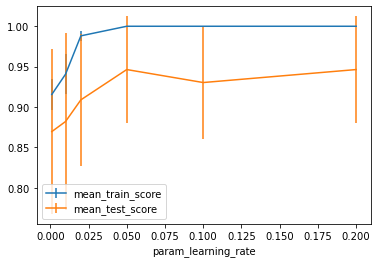

In [11]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_learning_rate', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [12]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

gbrt = GradientBoostingRegressor().fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.8127315988123817

In [13]:
param_grid = {'learning_rate': [.5, .2, .1, .05, .02, .01, .001]}
grid = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, cv=10,
                   return_train_score=True)
grid.fit(X_train, y_train);

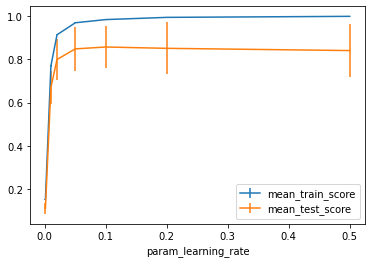

In [14]:
scores = pd.DataFrame(grid.cv_results_)

scores.plot(x='param_learning_rate', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_learning_rate', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [15]:
grid.best_params_, grid.best_score_

({'learning_rate': 0.1}, 0.8578212059552672)

In [16]:
gbrt.feature_importances_

array([0.04 , 0.   , 0.003, 0.001, 0.022, 0.309, 0.005, 0.051, 0.002,
       0.015, 0.045, 0.006, 0.501])

In [17]:
np.argsort(gbrt.feature_importances_)[-5:]

array([ 0, 10,  7,  5, 12], dtype=int64)